In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
url = 'https://www.worldometers.info/coronavirus/'
page = requests.get(url)
page

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
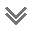

In [5]:
soup = BeautifulSoup(page.text, 'lxml')
soup

In [6]:
tabel = soup.find('table', id='main_table_countries_today')
tabel

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [9]:
# Obtain every title of columns with tag <th>
headers = []
for i in tabel.find_all('th'):
 title = i.text
 headers.append(title)
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [10]:
# Convert wrapped text in column 13 into one line text
headers[13] = 'Tests/1M pop'

In [11]:
# Create a dataframe
mydata = pd.DataFrame(columns = headers)

In [12]:
# Create a for loop to fill mydata
for j in tabel.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(mydata)
 mydata.loc[length] = row

In [13]:
mydata

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"125,871,582","+2,425","1,624,439",+18,"121,526,377","+20,717","2,720,766","6,945",...,,,,North America,\n,,,,,
1,,\nAsia\n,"215,732,392","+10,514","1,542,149",+43,"200,062,671","+7,466","14,127,572","15,510",...,,,,Asia,\n,,,,,
2,,\nEurope\n,"248,145,835","+15,979","2,032,941",+85,"243,872,164","+43,738","2,240,730","6,397",...,,,,Europe,\n,,,,,
3,,\nSouth America\n,"68,405,286",+625,"1,352,990",,"66,423,582",+702,"628,714","10,170",...,,,,South America,\n,,,,,
4,,\nOceania\n,"14,043,828",+226,"26,794",+2,"13,866,531",,"150,503",73,...,,,,Australia/Oceania,\n,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,,Total:,"68,405,286",+625,"1,352,990",,"66,423,582",,"628,714","10,170",...,,,,South America,,,,,,
243,,Total:,"14,043,828",+226,"26,794",+2,"13,866,531",+0,"150,503",73,...,,,,Australia/Oceania,,,,,,
244,,Total:,"12,813,904",+54,"258,672",,"12,081,517",,"473,715",548,...,,,,Africa,,,,,,
245,,Total:,721,,15,,706,,0,0,...,,,,,,,,,,


In [14]:
mydata.drop(mydata.index[0:7], inplace=True)
mydata.drop(mydata.index[222:229], inplace=True)
mydata.reset_index(inplace=True, drop=True)
# Drop “#” column
mydata.drop('#', inplace=True, axis=1)


In [16]:
# Export to csv
mydata.to_csv('covid_data.csv', index=False)
# Try to read csv
mydata2 = pd.read_csv('covid_data.csv')